In [7]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn 

from sklearn.metrics import confusion_matrix

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
raw_data_path = '..\\data\\raw\\'
processed_data_path = '..\\data\\processed\\'
save_results_path = '..\\reports\\'

os.listdir(save_results_path)

['.gitkeep',
 'figures',
 'LGBM_predictions.csv',
 'results_table.xlsx',
 '~$results_table.xlsx']

In [9]:
df_data = pd.read_csv(save_results_path + 'LGBM_predictions.csv')
df_data.drop(['Unnamed: 0'], axis=1, inplace=True)
df_data.head()
#df_data.columns

classes_dict = {0: 'Standing', 1: 'Sitting', 2: 'Walking',
                3:'Stand-to-walk', 4:'Stand-to-sit', 5: 'Sit-to-stand',
                6:' Walk-to-stand', 7:'Sit-to-walk', 8: 'Walk-to-sit'}
classes_list = list(classes_dict.values())

In [10]:
y_true = df_data['true_labels']
y_predicted = df_data['predicted_labelLGBM']

confusion_matrix_p = np.around(confusion_matrix(y_true, y_predicted, normalize='true'), 3)

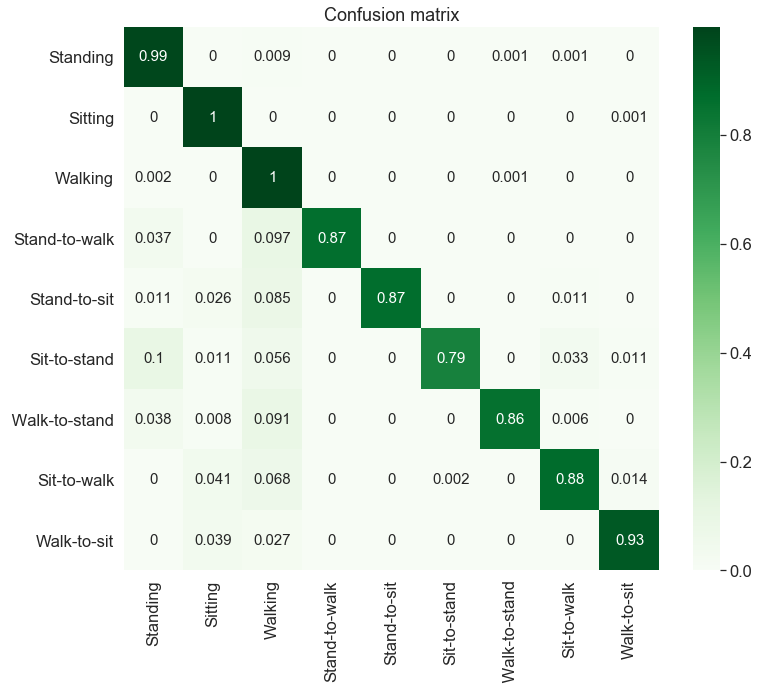

In [11]:
ax = plt.axes()
sn.set(font_scale=1.5)
sn.heatmap(confusion_matrix_p, annot=True,annot_kws={"size": 15},
           xticklabels=classes_list, yticklabels=classes_list, ax = ax, cmap="Greens")
ax.set_title('Confusion matrix')
plt.show()


In [6]:
confusion_matrix_p

array([[0.989, 0.   , 0.009, 0.   , 0.   , 0.   , 0.001, 0.001, 0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001],
       [0.002, 0.   , 0.997, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   ],
       [0.037, 0.   , 0.097, 0.866, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.011, 0.026, 0.085, 0.   , 0.868, 0.   , 0.   , 0.011, 0.   ],
       [0.1  , 0.011, 0.056, 0.   , 0.   , 0.789, 0.   , 0.033, 0.011],
       [0.038, 0.008, 0.091, 0.   , 0.   , 0.   , 0.857, 0.006, 0.   ],
       [0.   , 0.041, 0.068, 0.   , 0.   , 0.002, 0.   , 0.876, 0.014],
       [0.   , 0.039, 0.027, 0.   , 0.   , 0.   , 0.   , 0.   , 0.934]])